# Airline Passengers Satisfaction

 https://www.kaggle.com/datasets/mohaimenalrashid/invistico-airline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../dane/Invistico_Airline.csv')

In [4]:
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [6]:
df.describe(include=['O'])

,satisfaction,Customer Type,Type of Travel,Class
count,129880,129880,129880,129880
unique,2,2,2,3
top,satisfied,Loyal Customer,Business travel,Business
freq,71087,106100,89693,62160


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0
Seat comfort,129880.0,2.838597,1.392983,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,2.990645,1.527224,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,2.851994,1.443729,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.990422,1.305970,0.0,2.0,3.0,4.0,5.0
Inflight wifi service,129880.0,3.249130,1.318818,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,129880.0,3.383477,1.346059,0.0,2.0,4.0,4.0,5.0
Online support,129880.0,3.519703,1.306511,0.0,3.0,4.0,5.0,5.0
Ease of Online booking,129880.0,3.472105,1.305560,0.0,2.0,4.0,5.0,5.0


In [8]:
df.drop_duplicates(inplace=True)

# Target

In [9]:
df['satisfaction'].value_counts()

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

<Axes: xlabel='satisfaction', ylabel='count'>

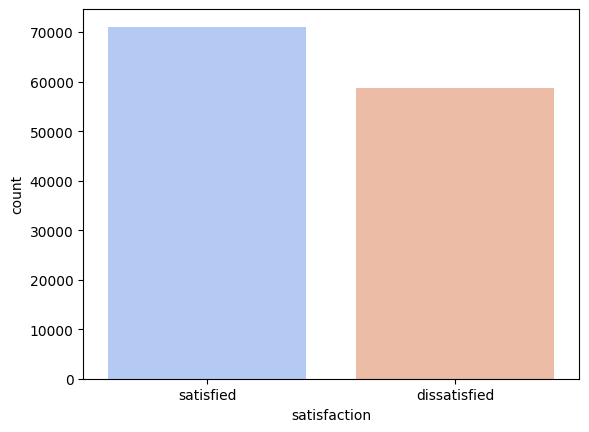

In [10]:
sns.countplot(x='satisfaction', data=df, palette='coolwarm')

Very similar number of speeches, satisfied and dissatisfied.

# Categorical variables

In [11]:
df.columns

Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [12]:
cat_vars = [col for col in df.columns if df[col].dtypes == 'O'] 

In [13]:
cat_vars.remove('satisfaction')

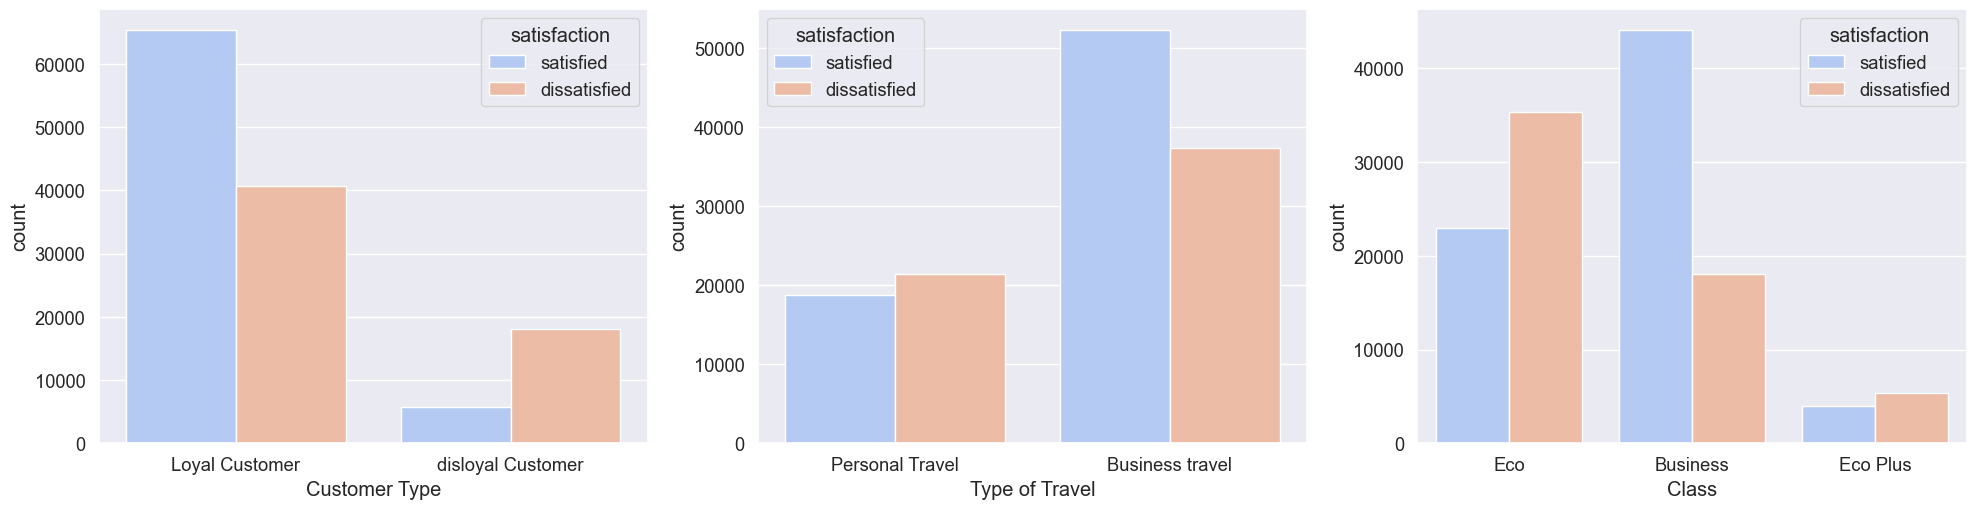

In [14]:
plt.figure(figsize=(20,15))
sns.set_style('ticks')
sns.set(font="Verdana")
sns.set(font_scale = 1.2)

for i, feature in enumerate(cat_vars):
    plt.subplot(3,3, i+1)
    sns.countplot(x=feature, data=df, hue='satisfaction', palette='coolwarm')
    plt.tight_layout()

Loyal customers flying business class on business trips were much more likely to be satisfied.

# Quantitative Variables

In [15]:
num_vars = [col for col in df.columns if df[col].dtypes == 'int64'] 

In [16]:
num_vars.append('Arrival Delay in Minutes')

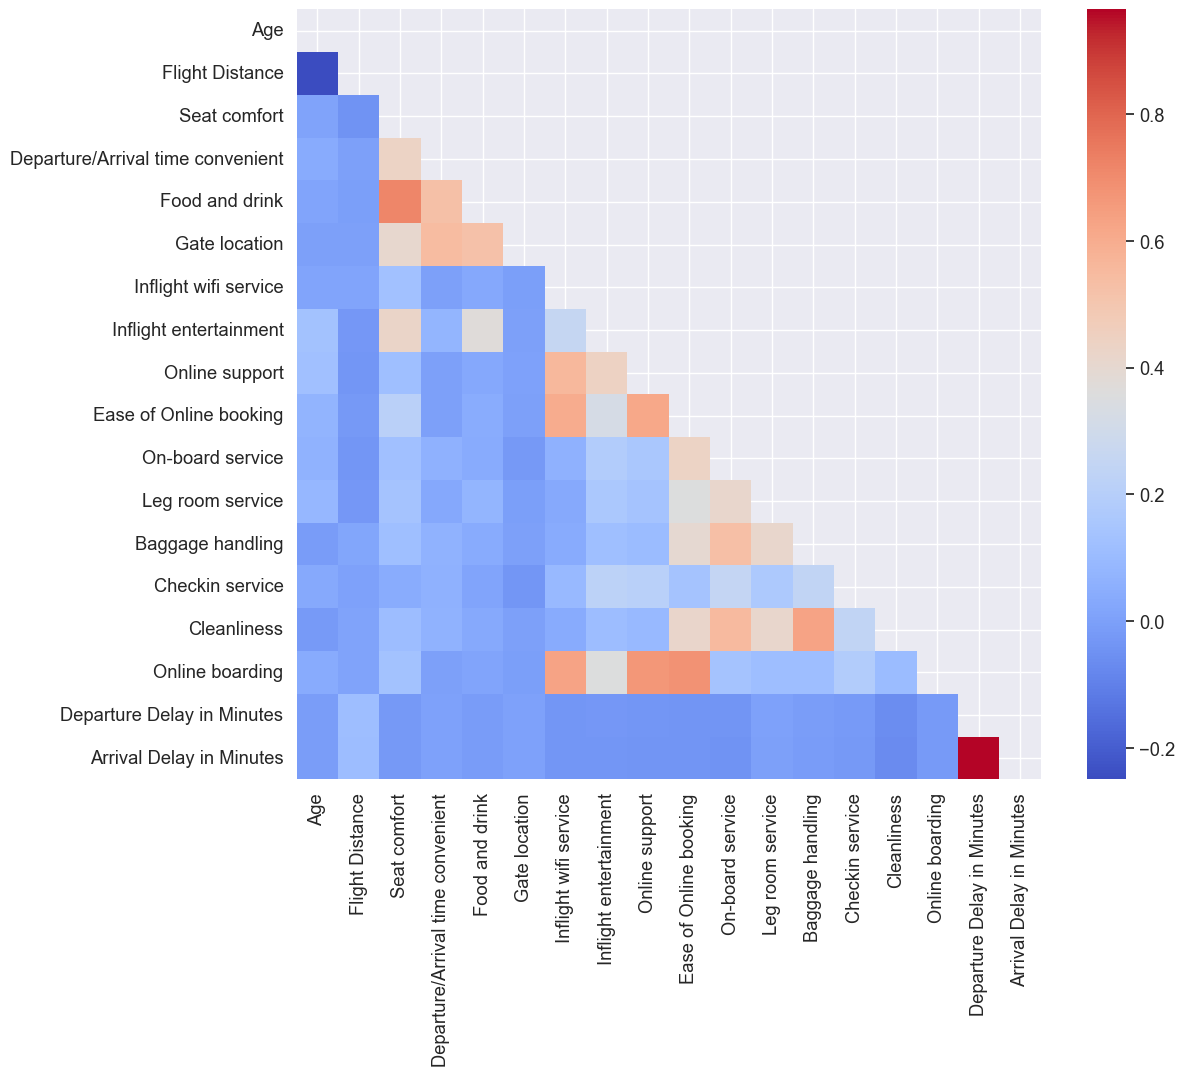

In [17]:
corr_matrix = df[num_vars].corr() 
upper_matrix = np.triu(corr_matrix)
plt.subplots(figsize=(12,10)) 
sns.heatmap(corr_matrix, annot=False, mask=upper_matrix, cmap='coolwarm') 
plt.show()

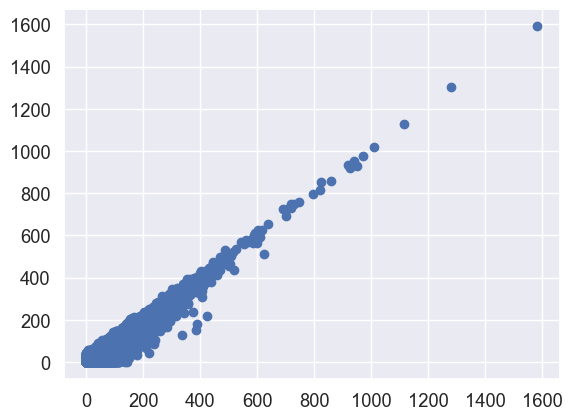

In [18]:
plt.scatter(df['Arrival Delay in Minutes'], df['Departure Delay in Minutes'])

High correlation between Arrival Delay and Departure Delay, delete Arrival Delay in Minutes

In [19]:
df = df.drop('Arrival Delay in Minutes', axis=1)

In [20]:
num_vars.remove('Arrival Delay in Minutes')

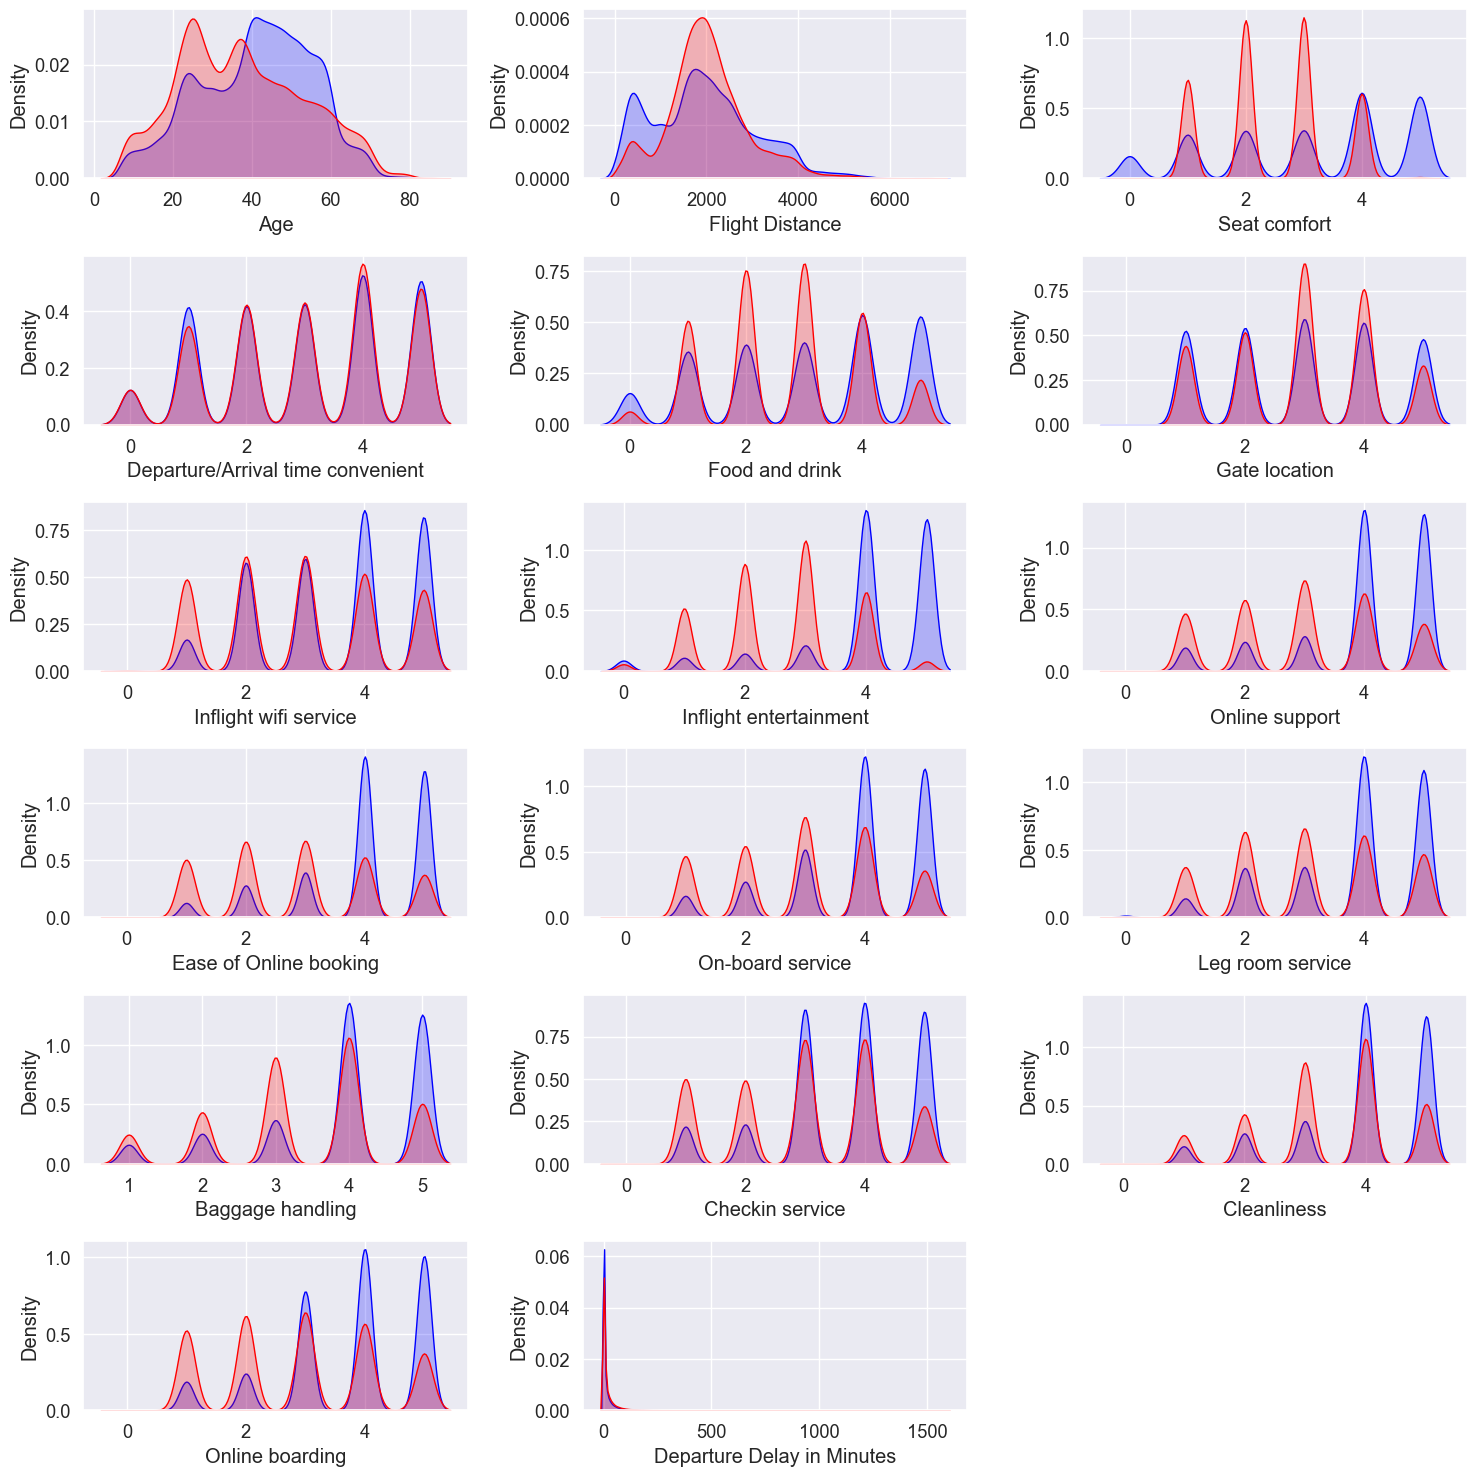

In [21]:
plt.figure(figsize=(15,15))
sns.set_style('ticks')
sns.set(font_scale=1.2)

for i, feature in enumerate(num_vars):
    plt.subplot(6,3, i+1)
    sns.kdeplot(df[feature][df['satisfaction'] == 'satisfied'], color = 'blue', shade=True)
    sns.kdeplot(df[feature][df['satisfaction'] == 'dissatisfied'], color = 'red', shade=True)
    plt.tight_layout()

The charts show what features influence satisfaction.

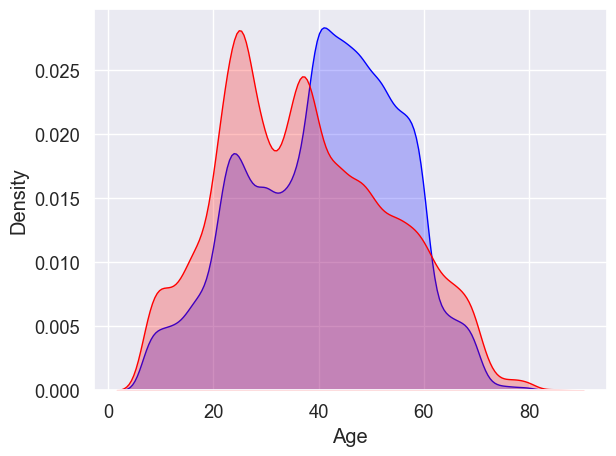

In [22]:
sns.kdeplot(df['Age'][df['satisfaction'] == 'satisfied'], color = 'blue', shade=True)
sns.kdeplot(df['Age'][df['satisfaction'] == 'dissatisfied'], color = 'red', shade=True)
plt.tight_layout()

Customers aged 40-60 are easiest to satisfy.

# Division of the set into test and training

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
df['satisfaction'] = df['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)

In [25]:
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Missing data

In [26]:
X_train.isna().sum()

Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
dtype: int64

In [27]:
X_test.isna().sum()

Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
dtype: int64

There are no missing values

In [28]:
for feature in num_vars:
    print(feature)
    print(X_train[feature].skew())

Age
-0.006476896364184921
Flight Distance
0.4635588517444383
Seat comfort
-0.09043103400211361
Departure/Arrival time convenient
-0.24810200328204762
Food and drink
-0.11344707024022711
Gate location
-0.04797792994655608
Inflight wifi service
-0.19074869507112158
Inflight entertainment
-0.6068028359634077
Online support
-0.5776638629629212
Ease of Online booking
-0.4961051998129734
On-board service
-0.5068544974637792
Leg room service
-0.49803877592422463
Baggage handling
-0.7412035632219875
Checkin service
-0.39331176767230847
Cleanliness
-0.7580266626670692
Online boarding
-0.37088325042528053
Departure Delay in Minutes
6.737033038337886


I did not remove outlier variables. It broke all models.

# OHE

In [29]:
for feature in cat_vars:
    dummies_train = pd.get_dummies(X_train[feature], prefix=feature)  
    dummies_test = pd.get_dummies(X_test[feature], prefix=feature)
    mask = X_train[feature].mode().values[0]
    col_name = feature+'_'+str(mask)
    
    X_train = pd.concat([X_train,dummies_train],axis=1)
    X_train.drop(feature, axis=1, inplace=True)
    X_train.drop(col_name, axis=1, inplace=True)
    
    X_test = pd.concat([X_test,dummies_test],axis=1)
    X_test.drop(feature, axis=1, inplace=True)
    X_test.drop(col_name, axis=1, inplace=True)

# Models

## Logistic Regression

In [30]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import roc_auc_score, confusion_matrix

In [31]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(max_iter=50, random_state=42)

In [32]:
lr1.fit(X_train, y_train)
y_pred_regresja = lr1.predict(X_test)

In [33]:
confMatrix = pd.DataFrame(confusion_matrix(y_test, y_pred_regresja))
confMatrix.columns = [['Predicted 0', 'Predicted 1']]
confMatrix.index = [['True 0', 'True 1']]
print('Confusion Matrix')
print(confMatrix)

Confusion Matrix
       Predicted 0 Predicted 1
True 0       10950        6604
True 1        4008       17402


In [34]:
lr1_accuracy = accuracy_score(y_test, y_pred_regresja)
lr1_recall = recall_score(y_test, y_pred_regresja)
lr1_precision = precision_score(y_test, y_pred_regresja)
lr1_f1 = f1_score(y_test, y_pred_regresja)

In [35]:
y_pred_proba = lr1.predict_proba(X_test)[:,1]

In [36]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

In [37]:
lr1_auc = metrics.roc_auc_score(y_test, y_pred_proba)

In [38]:
results1 = pd.DataFrame({
    'model': ['RL default'],
    'accuracy': lr1_accuracy,
    'precision': lr1_precision,
    'recall': lr1_recall,
    'f1-score': lr1_f1,
    'auc': lr1_auc
})

## Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt = DecisionTreeClassifier()

In [41]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
y_pred = dt.predict(X_test)

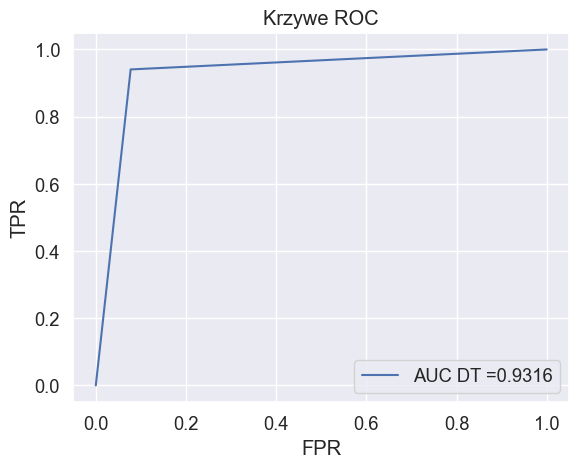

In [43]:
y_preds_dt = dt.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, _ = metrics.roc_curve(y_test, y_preds_dt)
dt_auc = roc_auc_score(y_test, y_preds_dt)
plt.plot(fpr_dt, tpr_dt, label="AUC DT =" + str(round(dt_auc, 4)))
plt.title('Krzywe ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

Model overfitted

## Decision Tree Optimalization

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
dt = DecisionTreeClassifier()

In [46]:
params = {
    'max_depth': np.arange(2,20),  
    'min_samples_leaf': np.arange(1,101),
    'min_samples_split': np.arange(1,26),
    'criterion': ["gini", "entropy"],  #
    'max_features': np.arange(5,16)
}

In [47]:
random_search = RandomizedSearchCV(estimator=dt,
                                  param_distributions=params,
                                  cv=3, n_jobs=-1, scoring ="roc_auc", n_iter=50, random_state=42)

In [48]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                                        'min_samples_leaf': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100]),
                                        'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])},
                   random_state=42, scoring='roc_auc')

In [49]:
dt_opt = random_search.best_estimator_

In [50]:
dt_opt_accuracy = accuracy_score(y_test, y_pred)
dt_opt_recall = recall_score(y_test, y_pred)
dt_opt_precision = precision_score(y_test, y_pred)
dt_opt_f1 = f1_score(y_test, y_pred)

In [51]:
y_preds_dt_opt = dt_opt.predict_proba(X_test)[:,1]
fpr_dt_opt, tpr_dt_opt, _ = metrics.roc_curve(y_test, y_preds_dt_opt) 
dt_opt_auc = roc_auc_score(y_test, y_preds_dt_opt)

In [52]:
results2 = pd.DataFrame({
    'model': ['DT opt'],
    'accuracy': dt_opt_accuracy,
    'precision': dt_opt_precision,
    'recall': dt_opt_recall,
    'f1-score': dt_opt_f1,
    'auc': dt_opt_auc
})

## Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rfc = RandomForestClassifier()

In [55]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
y_pred = rfc.predict(X_test)

In [57]:
y_pred_train = rfc.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41239
           1       1.00      1.00      1.00     49677

    accuracy                           1.00     90916
   macro avg       1.00      1.00      1.00     90916
weighted avg       1.00      1.00      1.00     90916



Model overfitted.

## Random Forest Optimalization

In [58]:
params = {
    'bootstrap': [True, False],
    'n_estimators': np.arange(10,150,30),
    'max_depth': np.arange(3,15),
    'min_samples_leaf': np.arange(5,50),
    'min_samples_split': np.arange(5,50),
    'criterion': ["gini", "entropy"],
    'max_features': ['log2', 'sqrt', None]
}

In [59]:
rfc = RandomForestClassifier()

In [60]:
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=params, cv=3, n_jobs=-1,
                                  scoring="roc_auc", n_iter=50, random_state=42)

In [61]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'max_features': ['log2', 'sqrt', None],
                                        'min_samples_leaf': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'min_samples_split': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'n_estimators': array([ 10,  40,  70, 100, 130])},
                   random_state=42, scoring='roc_auc')

In [62]:
rfc_opt = random_search.best_estimator_

In [63]:
y_pred = rfc_opt.predict(X_test)

In [64]:
y_pred_rf_opt = rfc_opt.predict_proba(X_test)[:,1]

In [65]:
y_preds_rf_opt = rfc_opt.predict_proba(X_test)[:,1]
fpr_rf_opt, tpr_rf_opt, _ = metrics.roc_curve(y_test, y_preds_rf_opt)
rf_opt_auc = roc_auc_score(y_test, y_preds_rf_opt)

In [66]:
rf_opt_accuracy = accuracy_score(y_test, y_pred)
rf_opt_recall = recall_score(y_test, y_pred)
rf_opt_precision = precision_score(y_test, y_pred)
rf_opt_f1 = f1_score(y_test, y_pred)

In [67]:
results3 = pd.DataFrame({
    'model': ['RF opt'],
    'accuracy': rf_opt_accuracy,
    'precision': rf_opt_precision,
    'recall': rf_opt_recall,
    'f1-score': rf_opt_f1,
    'auc': rf_opt_auc
})

# XGB

In [68]:
from sklearn.model_selection import RandomizedSearchCV

In [69]:
import xgboost as xgb
from xgboost import XGBClassifier

In [70]:
params = {
    'max_depth': np.arange(3,10), # maksymalna glebokosc drzewa
    'min_child_weight': np.arange(8,15), # minimalna liczba próbek, które musi mieć węzeł
    'gamma': np.arange(0,0.5,0.1), # minimalny spadek wartości funkcji straty, aby węzeł został dokonany
    'subsample': [i/10 for i in range(6,11)], # jaki udział wszystkich obserwacji wybierany jest przy każdym kolejnym podziale
    'colsample_bytree': [i/10 for i in range(6,11)], # max_features (udział wszystkich zmiennych w modelu)
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100], # moc regularyzacji
    'n_estimators': np.arange(10,150,30), # liczba drzew
    'learning_rate': [0.01, 0.1, 0.2, 0.3] # stopień w jakim informacje sa przekazywane kolejnym drzewom
}

In [71]:
xgb = XGBClassifier(objective= 'binary:logistic')

In [72]:
random_search = RandomizedSearchCV(estimator=xgb,
                                  param_distributions=params,
                                  cv=3, n_jobs=-1, scoring = "roc_auc", n_iter=50, random_state=42)

In [73]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': array([0. , 0.1, 0.2, 0.3, 0.4]),
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_child_weight': array([ 8,  9, 10, 11, 12, 13, 14]),
                                        'n_estimators': array([ 10,  40,  70, 100, 130]),
                                        'reg_alpha': [1e-05, 0.01, 0.1, 1, 100],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='roc_auc')

In [74]:
xgb_opt = random_search.best_estimator_

In [75]:
y_pred = xgb_opt.predict(X_test)

In [76]:
xgb_opt_recall = recall_score(y_test, y_pred)
xgb_opt_precision = precision_score(y_test, y_pred)
xgb_opt_f1 = f1_score(y_test, y_pred)
xgb_opt_accuracy = accuracy_score(y_test, y_pred)

In [77]:
confMatrix = pd.DataFrame(confusion_matrix(y_test, y_pred))
confMatrix.columns = [['Predicted 0', 'Predicted 1']]
confMatrix.index = [['True 0', 'True 1']]
print('Confusion Matrix')
print(confMatrix)

Confusion Matrix
       Predicted 0 Predicted 1
True 0       16913         641
True 1        1055       20355


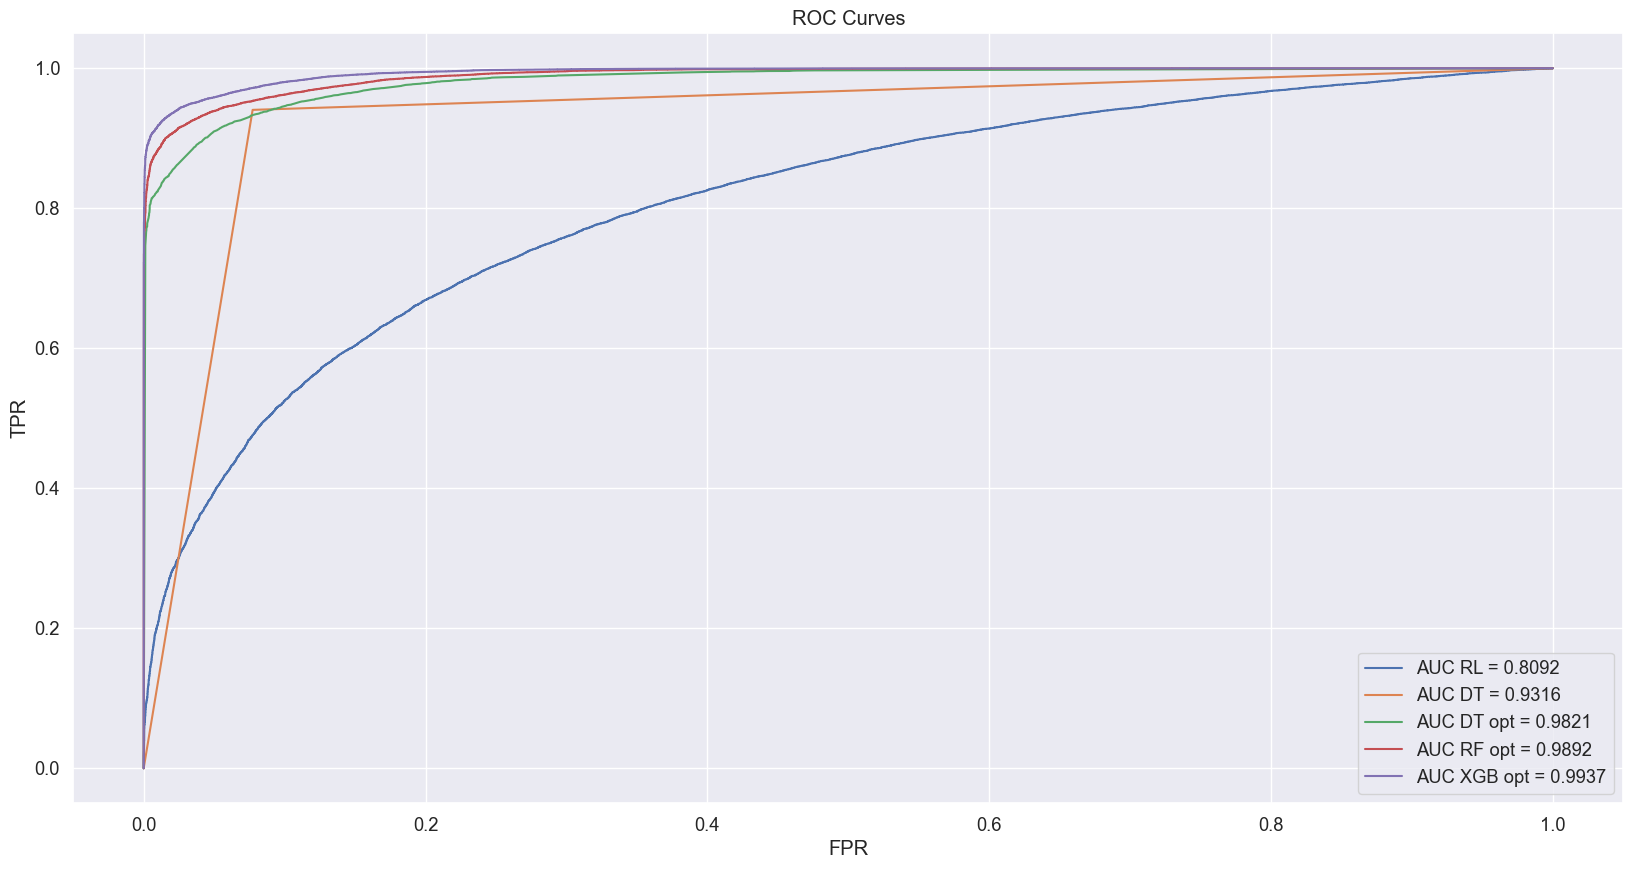

In [78]:
figure = plt.subplots(figsize=(20,10))
y_preds_xgb_opt = xgb_opt.predict_proba(X_test)[:,1]
fpr_xgb_opt, tpr_xgb_opt, _ = metrics.roc_curve(y_test, y_preds_xgb_opt) 
xgb_opt_auc = roc_auc_score(y_test, y_preds_xgb_opt)
plt.plot(fpr, tpr, label="AUC RL = " + str(round(lr1_auc, 4)))
plt.plot(fpr_dt, tpr_dt, label="AUC DT = " + str(round(dt_auc, 4)))
plt.plot(fpr_dt_opt, tpr_dt_opt, label="AUC DT opt = " + str(round(dt_opt_auc, 4)))
plt.plot(fpr_rf_opt, tpr_rf_opt, label="AUC RF opt = " + str(round(rf_opt_auc, 4)))
plt.plot(fpr_xgb_opt, tpr_xgb_opt, label="AUC XGB opt = " + str(round(xgb_opt_auc, 4)))
plt.title("ROC Curves")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [79]:
results4 = pd.DataFrame({
    'model': ['XGB opt'],
    'accuracy': xgb_opt_accuracy,
    'precision': xgb_opt_precision,
    'recall': xgb_opt_recall,
    'f1-score': xgb_opt_f1,
    'auc': xgb_opt_auc
})

In [80]:
pd.concat([results1, results2, results3, results4])

,model,accuracy,precision,recall,f1-score,auc
0,RL default,0.727646,0.724902,0.812798,0.766338,0.809245
0,DT opt,0.932502,0.936866,0.940542,0.938700,0.982130
0,RF opt,0.944077,0.960623,0.936618,0.948469,0.989232
0,XGB opt,0.956473,0.969470,0.950724,0.960006,0.993712


Model comparison. In my opinion, it is very important to correctly interpret the task results.

In all metrics: accuracy, precision, recall and f1-score XGBoost is the best.
    
Accuracy: what proportion of observations from all were classified correctly, a good metric if a similar number of cases in both classes.
    
Precision: how many of those classified positively are actually positive, crucial when we do not want to make 'false positive' errors.
        
Recall: what is the % of correctly classified cases out of all positive cases, the key is how we want to catch all 'true positive' cases.
    
F1-score: an important metric for how we want to balance precision and recall.
    